
# Phân loại chữ số viết tay bằng Hồi quy Logistic (Logistic Regression)


In [1]:

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import datasets, metrics 
from sklearn.model_selection import train_test_split 
import numpy as np



## Bộ dữ liệu MNIST

Cơ sở dữ liệu **MNIST** gồm các chữ số viết tay dùng cho bài toán phân loại 10 chữ số từ 0 đến 9.  
Bộ dữ liệu gốc có **60.000 mẫu huấn luyện** và **10.000 mẫu kiểm tra**, mỗi ảnh có kích thước **28x28 pixel**.

Tuy nhiên, trong thí nghiệm này, ta sử dụng **phiên bản rút gọn** gồm **1797 mẫu**, kích thước ảnh **8x8**, có sẵn trong **Scikit-Learn**.


In [2]:

# Tải bộ dữ liệu chữ số
digits = datasets.load_digits() 
n_samples = len(digits.images) 
print('Số lượng mẫu:', n_samples)


Số lượng mẫu: 1797


In [3]:

print('Kích thước mẫu ảnh:', digits.images.shape)


Kích thước mẫu ảnh: (1797, 8, 8)



Trước tiên, ta cần hiểu bộ dữ liệu bằng cách hiển thị một số mẫu ngẫu nhiên.


In [4]:

# Hàm hiển thị các ảnh ngẫu nhiên trong bộ dữ liệu
def display_digits(X, Y): 
    fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(10, 10)) 
    fig.suptitle("Hiển thị ngẫu nhiên một số ảnh trong tập huấn luyện") 
    for i in range(5): 
        for j in range(5): 
            ind = np.random.randint(X.shape[0]) 
            tmp = X[ind, :]  # .reshape(8, 8)
            ax[i,j].set_title(f"Nhãn: {Y[ind]}") 
            ax[i,j].imshow(tmp, cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False) 
            plt.setp(ax[i,j].get_yticklabels(), visible=False) 
    fig.subplots_adjust(hspace=0.5, wspace=0.5)



Tiếp theo, chia dữ liệu thành **80% huấn luyện** và **20% kiểm tra**.


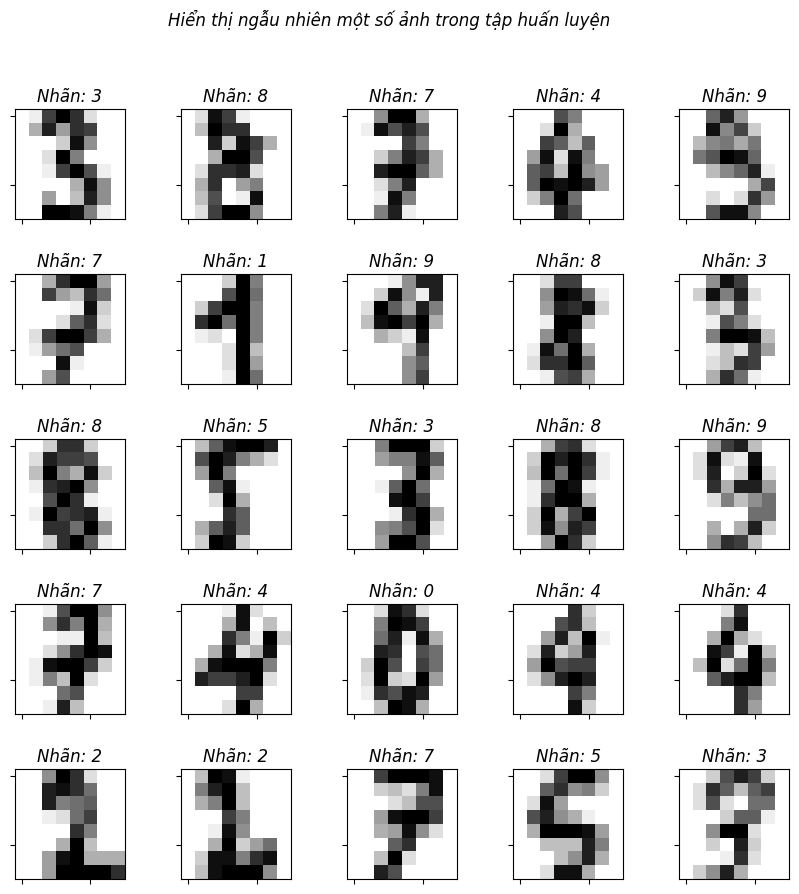

In [5]:

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    digits.images, digits.target, test_size=0.2, random_state=200, shuffle=False
)

display_digits(X_train, y_train)



Do dữ liệu ảnh có kích thước 8x8 (64 đặc trưng), việc trực quan hóa có thể khó khăn.  
Ta sẽ dùng **Phân tích thành phần chính (PCA)** để giảm chiều dữ liệu xuống **2 thành phần** và biểu diễn bằng đồ thị.


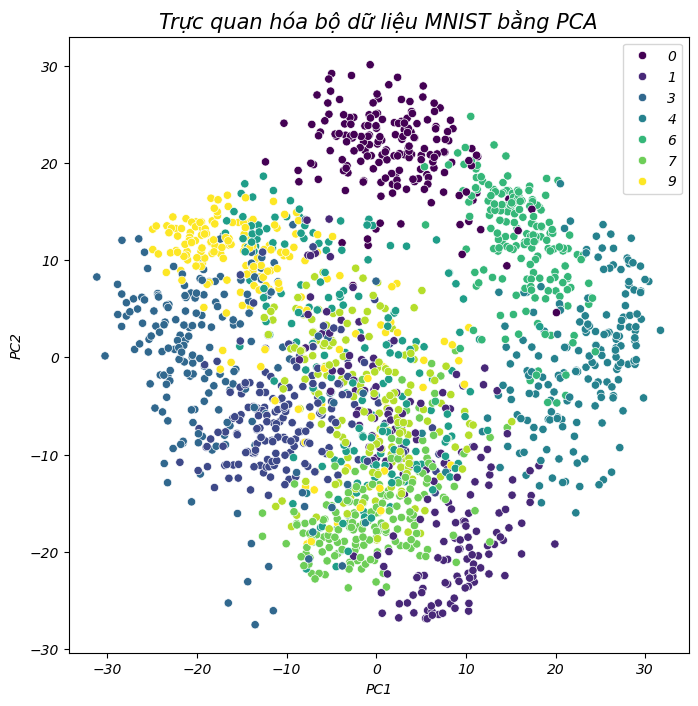

In [6]:

from sklearn.decomposition import PCA

# Tạo mô hình PCA với 2 thành phần chính
pca = PCA(n_components=2)
reduced_data_pca = pca.fit_transform(digits.data)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=reduced_data_pca[:, 0], 
    y=reduced_data_pca[:, 1], 
    hue=digits.target, 
    palette='viridis'
)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Trực quan hóa bộ dữ liệu MNIST bằng PCA', fontsize=15)
plt.show()



## Xây dựng mô hình và kết quả

Trước khi áp dụng mô hình phân loại, ta cần **làm phẳng (flatten)** ảnh — chuyển mỗi ảnh 8x8 thành vectơ 64 phần tử.  
Khi đó, toàn bộ dữ liệu sẽ có kích thước `(số mẫu, 64)`.


In [7]:

# Làm phẳng ảnh
X_train = X_train.reshape((len(X_train), -1)) 
X_test = X_test.reshape((len(X_test), -1))



Sau đó, huấn luyện mô hình **Hồi quy Logistic (Logistic Regression)**.


In [8]:

from sklearn.linear_model import LogisticRegression

# Khởi tạo mô hình Logistic Regression
clf = LogisticRegression(
    penalty='l2',  
    fit_intercept=True, 
    random_state=2021, 
    solver='lbfgs', 
    max_iter=100, 
    verbose=1, 
    n_jobs=5,
)


In [9]:

# Huấn luyện mô hình
clf.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predicted = clf.predict(X_test)


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.



## Hiển thị kết quả dự đoán


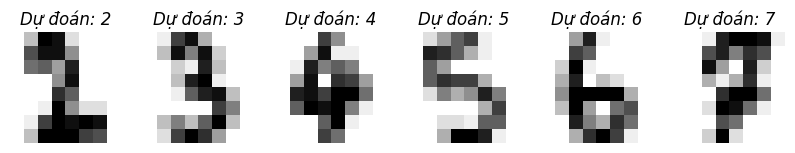

In [10]:

# Hiển thị một số kết quả dự đoán
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3)) 
for ax, image, prediction in zip(axes, X_test, predicted): 
    ax.set_axis_off() 
    image = image.reshape(8, 8) 
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest') 
    ax.set_title(f'Dự đoán: {prediction}')
plt.show()



## Đánh giá mô hình

Đánh giá mô hình là bước quan trọng giúp phân tích độ chính xác của mô hình.  
Trong ví dụ này, ta sử dụng **độ chính xác (accuracy)** làm thước đo chính.


In [15]:

# Báo cáo đánh giá mô hình
print("Báo cáo phân loại cho mô hình {clf}:
{metrics.classification_report(y_test, predicted)}")


SyntaxError: unterminated string literal (detected at line 2) (2465037223.py, line 2)


Mô hình đạt **độ chính xác khoảng 91%** trên tập kiểm tra.  
Tiếp theo, ta kiểm tra **Ma trận nhầm lẫn (Confusion Matrix)** để xem chi tiết các nhãn bị phân loại sai.


In [ ]:

plt.figure(figsize=(5, 5)) 
ax = plt.gca() 
disp = metrics.plot_confusion_matrix(clf, X_test, y_test, ax=ax) 
disp.figure_.suptitle("Ma trận nhầm lẫn (Confusion Matrix)", fontsize=15)
plt.show()



## Kết luận

Mô hình **Hồi quy Logistic** có thể dự đoán chính xác phần lớn chữ số viết tay.  
Tuy nhiên, một số mẫu vẫn bị nhầm lẫn — thể hiện rõ trong ma trận nhầm lẫn.
